In [1]:
from splinter import Browser

In [20]:
import pandas as pd
import matplotlib as plt
import os

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from scripts import trulia_scraper
import json

In [4]:
webdriver_path = {'executable_path': r'chromedriver.exe'}

# initiate browser
browser = Browser('chrome', **webdriver_path, headless=False)

In [5]:
f = open('./scripts/home_schema.json')
schema = json.load(f)

In [36]:
home_urls = trulia_scraper.get_listing_urls_by_state_city(browser, 'NY', 'Cold_Spring_Harbor')

In [38]:
with open('./Data/ny_cold-spring-harbor.json', 'w') as j:
    json.dump(home_urls, j)

In [39]:
home_data = trulia_scraper.get_listings_by_listing_urls(browser,schema,home_urls)

In [42]:
with open('./Data/ny_cold-spring-harbor_20210302.json', 'w') as d:
    json.dump(home_data, d)

In [40]:
hd = pd.DataFrame(home_data)

array([[<AxesSubplot:title={'center':'listed_price'}>]], dtype=object)

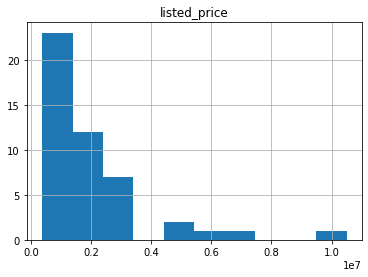

In [43]:
hd.hist(column='listed_price')

In [34]:
data = trulia_scraper.get_listings_by_state_city(browser, schema, 'NY', 'Hicksville')

In [35]:
data

[{'address_street': '144 5th St',
  'address_city_state': 'Hicksville, NY 11801',
  'listed_price': 669000,
  'days_on_market': 1,
  'building_area': None,
  'basement_features': None,
  'bedrooms': 4,
  'bathrooms': 2,
  'full_bathrooms': None,
  'appliances_list': None,
  'flooring_type': 'Hardwood, Wall To Wall Carpet',
  'garage_spaces': 1,
  'parking_features': None,
  'sewer_type': None,
  'year_built': 1928,
  'construction_materials': None,
  'property_type': None,
  'property_subtype': None,
  'mls_status': None,
  'listing_status': 'Active',
  'virtual_tour_url': None,
  'mls_id': None,
  'elementary_school': None,
  'elementary_school_district': 'Hicksville',
  'jr_mid_school': None,
  'jr_mid_school_district': 'Hicksville',
  'high_school': None,
  'high_school_district': 'Hicksville',
  'lot_area': 0.09,
  'tax_block': None,
  'tax_lot': None},
 {'address_street': '6 Story Ln',
  'address_city_state': 'Hicksville, NY 11801',
  'listed_price': 529999,
  'days_on_market': 3,

In [11]:
home1 = 'https://www.trulia.com/p/ny/hicksville/69-elm-st-hicksville-ny-11801--2010964403'
home2 = 'https://www.trulia.com/p/ct/westport/7-sunnyside-ln-westport-ct-06880--2005761044'
home3 = 'https://www.trulia.com/p/ct/weston/131-lyons-plain-rd-weston-ct-06883--2005762377'

In [11]:
parser = trulia_scraper.listing(browser, schema, home1)

In [15]:
results = parser.parse_page()

In [16]:
results

{'address_street': '69 Elm St',
 'address_city_state': 'Hicksville, NY 11801',
 'listed_price': '$615,000',
 'building_area': None,
 'basement_features': None,
 'bedrooms': 4,
 'bathrooms': 2,
 'full_bathrooms': None,
 'appliances_list': None,
 'flooring_type': 'Hardwood',
 'garage_spaces': 1,
 'parking_features': None,
 'sewer_type': None,
 'year_built': 1954,
 'construction_materials': None,
 'property_type': None,
 'property_subtype': None,
 'mls_status': None,
 'listing_status': 'Pending',
 'virtual_tour_url': None,
 'mls_id': None,
 'elementary_school': 'East Street School',
 'elementary_school_district': 'Hicksville',
 'jr_mid_school': 'Hicksville Middle School',
 'jr_mid_school_district': 'Hicksville',
 'high_school': None,
 'high_school_district': 'Hicksville',
 'lot_area': 0.14,
 'tax_block': None,
 'tax_lot': None}